In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('electricity consumption.csv')
df

,Year,Month,Domestic,Commercial,Industrial,Total,Avg temp,Avg dew pt temp,Humidity(%)
0,2012,1,2586,6983,780,10349,15.1,11.9,82
1,2012,2,2666,6507,809,9982,15.8,13.1,85
2,2012,3,2827,7294,868,10989,19.0,15.8,83
3,2012,4,2753,7921,910,11584,23.9,21.2,85
4,2012,5,3862,9852,1047,14761,27.0,24.4,86
...,...,...,...,...,...,...,...,...,...
115,2021,8,5453,10459,1033,16945,28.8,25.4,83
116,2021,9,5686,10246,1036,16968,29.7,25.4,78
117,2021,10,3850,9231,907,13988,26.0,21.4,76
118,2021,11,3098,7615,760,11473,22.4,15.8,67


In [3]:
el = np.array(df['Total']).reshape(-1, 1)
month = np.array(df['Month']).reshape(-1, 1)
temp = np.array(df['Avg temp']).reshape(-1, 1)
dtemp = np.array(df['Avg dew pt temp']).reshape(-1, 1)
hu = np.array(df['Humidity(%)']).reshape(-1, 1)

# A scatter plot to represent the relationship between the rescaled months (x) and the rescaled electricity consumption (y)

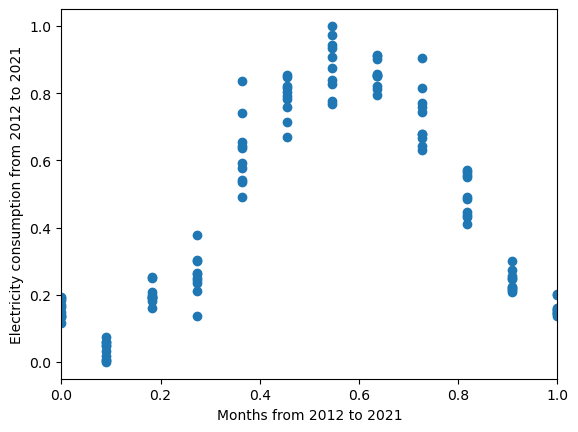

In [4]:
scaler = MinMaxScaler()
month1 = scaler.fit_transform(month)
Y = scaler.fit_transform(el)

plt.scatter(month1, Y)

plt.xlabel("Months from 2012 to 2021")
plt.ylabel("Electricity consumption from 2012 to 2021")
plt.xlim((0, 1))
plt.show()

# A scatter plot to represent the relationship between the rescaled average temperature (x) and the rescaled electricity consumption (y)

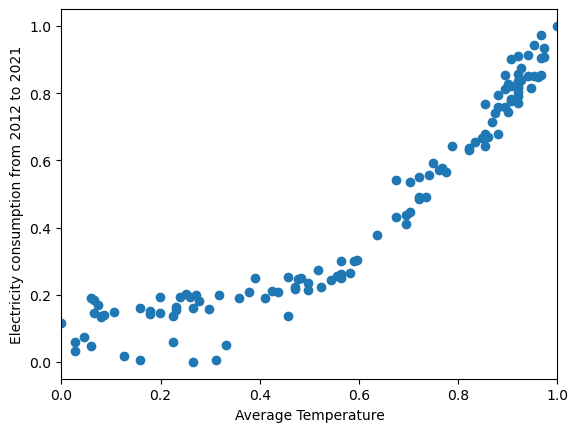

In [5]:
scaler = MinMaxScaler()
temp1 = scaler.fit_transform(temp)
Y = scaler.fit_transform(el)


plt.scatter(temp1, Y)

plt.xlabel("Average Temperature")
plt.ylabel("Electricity consumption from 2012 to 2021")
plt.xlim((0, 1))
plt.show()

# A scatter plot to represent the relationship between the rescaled average dew point temperature (x) and the rescaled electricity consumption (y)

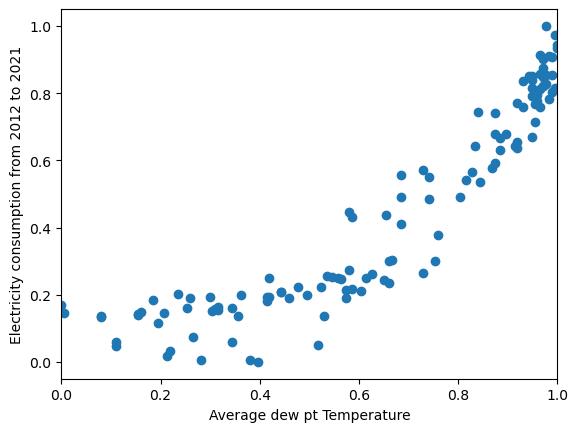

In [6]:
scaler = MinMaxScaler()
dtemp1 = scaler.fit_transform(dtemp)
Y = scaler.fit_transform(el)


plt.scatter(dtemp1, Y)

plt.xlabel("Average dew pt Temperature")
plt.ylabel("Electricity consumption from 2012 to 2021")
plt.xlim((0, 1))
plt.show()

# A scatter plot to represent the relationship between the rescaled months (x) and the rescaled electricity consumption (y)

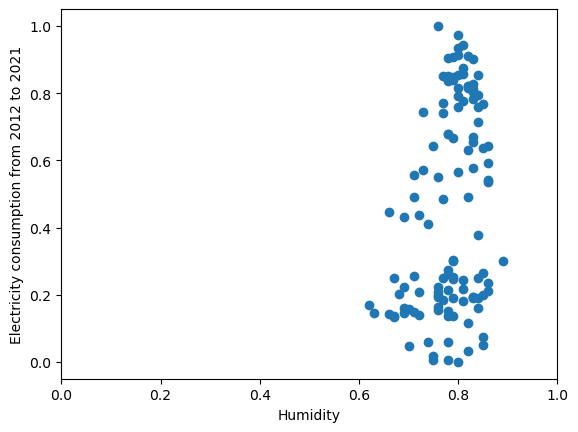

In [7]:
scaler = MinMaxScaler()
hu1 = hu/100
Y = scaler.fit_transform(el)


plt.scatter(hu1, Y)

plt.xlabel("Humidity")
plt.ylabel("Electricity consumption from 2012 to 2021")
plt.xlim((0, 1))
plt.show()

# Here I will use the months, the temperature, the dew point temperature and the humidity as the independant variables x
## Then group them into a 120x4 matrix

In [8]:
X = np.concatenate((month, temp, dtemp, hu), axis = 1)

print(len(X), (X.size / len(X)))
print(X)

120 4.0
[[ 1.  15.1 11.9 82. ]
 [ 2.  15.8 13.1 85. ]
 [ 3.  19.  15.8 83. ]
 [ 4.  23.9 21.2 85. ]
 [ 5.  27.  24.4 86. ]
 [ 6.  28.1 25.  83. ]
 [ 7.  28.8 25.2 81. ]
 [ 8.  29.5 24.9 77. ]
 [ 9.  28.  23.  75. ]
 [10.  25.6 20.4 74. ]
 [11.  22.2 18.7 81. ]
 [12.  17.8 13.8 78. ]
 [ 1.  16.7 11.3 71. ]
 [ 2.  19.1 15.4 80. ]
 [ 3.  20.5 16.5 79. ]
 [ 4.  21.5 19.  86. ]
 [ 5.  25.7 23.2 86. ]
 [ 6.  28.2 25.1 84. ]
 [ 7.  28.  25.1 85. ]
 [ 8.  28.6 25.3 83. ]
 [ 9.  27.5 23.9 82. ]
 [10.  25.7 18.6 66. ]
 [11.  21.7 16.2 72. ]
 [12.  16.1  8.6 63. ]
 [ 1.  16.3  9.9 67. ]
 [ 2.  15.5 12.3 82. ]
 [ 3.  18.7 15.7 83. ]
 [ 4.  22.6 20.  86. ]
 [ 5.  26.4 23.7 86. ]
 [ 6.  29.  25.  80. ]
 [ 7.  29.8 25.9 80. ]
 [ 8.  29.  25.3 81. ]
 [ 9.  29.  24.5 77. ]
 [10.  26.2 20.4 71. ]
 [11.  22.6 18.5 78. ]
 [12.  16.3  9.9 67. ]
 [ 1.  16.4 11.2 72. ]
 [ 2.  17.5 13.4 78. ]
 [ 3.  19.9 17.1 85. ]
 [ 4.  23.6 19.2 77. ]
 [ 5.  27.5 24.5 85. ]
 [ 6.  29.7 25.7 80. ]
 [ 7.  29.1 25.  79. ]
 [ 

# Linear Regression

## No transformation

## Split and rescale the data, then fit a model and perform cross validation

In [9]:
for seed in range(364, 369):
    X_train, X_test, Y_train, Y_test = train_test_split(X, el, test_size = 0.2, random_state = seed)

    X_train = scaler.fit_transform(X_train)
    Y_train = scaler.fit_transform(Y_train)
    
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    
    cv = KFold(n_splits = 5, shuffle = True, random_state = seed)
    print('MSE: ', -cross_val_score(lr, X_train, Y_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Variance: ', cross_val_score(lr, X_train, Y_train, scoring = 'explained_variance', cv = cv))
    
    X_test = scaler.fit_transform(X_test)
    Y_test = scaler.fit_transform(Y_test)

    print('Test MSE: ', mean_squared_error(Y_test, lr.predict(X_test)), '\n')

MSE:  [0.00853477 0.014299   0.01192372 0.02093978 0.01369451]
Variance:  [0.90366366 0.8506119  0.8821686  0.84671716 0.82097415]
Test MSE:  0.019488600679710155 

MSE:  [0.01556125 0.00826831 0.0125176  0.0137756  0.0146768 ]
Variance:  [0.83933412 0.85667979 0.86849049 0.83202989 0.85469049]
Test MSE:  0.011858630889483092 

MSE:  [0.01700465 0.01460414 0.01130284 0.01218176 0.0122216 ]
Variance:  [0.87619427 0.86732615 0.88477188 0.88782984 0.86190177]
Test MSE:  0.01312718010640145 

MSE:  [0.0142595  0.01351427 0.01059776 0.01438161 0.01092597]
Variance:  [0.87900241 0.88216283 0.8491895  0.86390286 0.83419318]
Test MSE:  0.022982918794407337 

MSE:  [0.00967572 0.00994416 0.00909657 0.0130955  0.01700888]
Variance:  [0.90205889 0.89576179 0.8917449  0.84626391 0.82248097]
Test MSE:  0.01853704664935059 



## Polynomial features of degree at most 2

## Use PolynomialFeatures to generate all polynomial of degree at most 2 from the raw input $x$:

In [10]:
poly2 = PolynomialFeatures(degree = 2, include_bias = False)
X2 = poly2.fit_transform(X)
print(len(X2), (X2.size / len(X2)))

120 14.0


## Split and rescale the data, then fit a model and perform cross validation

In [11]:
for seed in range(364, 369):
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, el, test_size = 0.2, random_state = seed)

    X2_train = scaler.fit_transform(X2_train)
    Y2_train = scaler.fit_transform(Y2_train)
    
    lr2 = LinearRegression()
    lr2.fit(X2_train, Y2_train)
    
    cv = KFold(n_splits = 5, shuffle = True, random_state = seed)
    print('MSE: ', -cross_val_score(lr2, X2_train, Y2_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Varience: ', cross_val_score(lr2, X2_train, Y2_train, scoring = 'explained_variance', cv = cv))
    
    X2_test = scaler.fit_transform(X2_test)
    Y2_test = scaler.fit_transform(Y2_test)

    print('Test MSE: ', mean_squared_error(Y2_test, lr2.predict(X2_test)), '\n')

MSE:  [0.0029741  0.00422146 0.00271733 0.0036356  0.00266522]
Varience:  [0.96930525 0.95736528 0.97507825 0.96816803 0.9648773 ]
Test MSE:  76.43537902178834 

MSE:  [0.00371539 0.00211998 0.00263564 0.00203442 0.00299216]
Varience:  [0.96056325 0.96679703 0.97475936 0.9755403  0.96765224]
Test MSE:  3.9612587389463414 

MSE:  [0.00281336 0.00429459 0.00279164 0.00439053 0.00367113]
Varience:  [0.97385035 0.96064534 0.96989186 0.9598376  0.95485029]
Test MSE:  47.92016424337536 

MSE:  [0.0029831  0.00462319 0.00311199 0.00188426 0.00308706]
Varience:  [0.97440861 0.96356336 0.95022204 0.98100993 0.96319548]
Test MSE:  1.3187557087237254 

MSE:  [0.00213809 0.00297518 0.00294031 0.0021821  0.00400915]
Varience:  [0.97838564 0.96805274 0.96488219 0.97234276 0.95958505]
Test MSE:  116.97640564150215 



## Polynomial features of degree at most 3

## Use PolynomialFeatures to generate all polynomial of degree at most 3 from the raw input $x$:

In [12]:
poly3 = PolynomialFeatures(degree = 3, include_bias = False)
X3 = poly3.fit_transform(X)
print(len(X3), (X3.size / len(X3)))

120 34.0


## Split and rescale the data, then fit a model and perform cross validation

In [13]:
for seed in range(364, 369):
    X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, el, test_size = 0.2, random_state = seed)

    X3_train = scaler.fit_transform(X3_train)
    Y3_train = scaler.fit_transform(Y3_train)
    
    lr3 = LinearRegression()
    lr3.fit(X3_train, Y3_train)
    
    cv = KFold(n_splits = 5, shuffle = True, random_state = seed)
    print('MSE: ', -cross_val_score(lr3, X3_train, Y3_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Variance: ', cross_val_score(lr3, X3_train, Y3_train, scoring = 'explained_variance', cv = cv))
    
    X3_test = scaler.fit_transform(X3_test)
    Y3_test = scaler.fit_transform(Y3_test)

    print('Test MSE: ', mean_squared_error(Y3_test, lr3.predict(X3_test)), '\n')

MSE:  [0.00440177 0.0522802  0.00329351 0.01263238 0.00402967]
Variance:  [0.95038589 0.39699054 0.96744667 0.8875134  0.94670481]
Test MSE:  11781213.073245177 

MSE:  [0.02899974 0.00258131 0.00186652 0.01797602 0.00423564]
Variance:  [0.69732085 0.96367144 0.9829035  0.78359871 0.95417061]
Test MSE:  139777.37712868841 

MSE:  [0.01490282 0.00637151 0.00619079 0.00564354 0.01031954]
Variance:  [0.85767125 0.94832996 0.93609136 0.94860063 0.87353858]
Test MSE:  58209694.16403741 

MSE:  [0.00637615 0.0089976  0.01103591 0.02364877 0.00964004]
Variance:  [0.9428937  0.93334631 0.82823258 0.79090704 0.89285492]
Test MSE:  8053017.884719652 

MSE:  [0.03336388 0.00536757 0.00362516 0.00255749 0.01000881]
Variance:  [0.65539482 0.94041038 0.96275143 0.97199623 0.89308054]
Test MSE:  176811986.09072876 



## Polynomial features of degree at most 10

## Use PolynomialFeatures to generate all polynomial of degree at most 10 from the raw input $x$:

In [14]:
poly10 = PolynomialFeatures(degree = 10, include_bias = False)
X10 = poly10.fit_transform(X)
print(len(X10), (X10.size / len(X10)))

120 1000.0


## Split and rescale the data, then fit a model and perform cross validation

In [15]:
for seed in range(364, 369):
    X10_train, X10_test, Y10_train, Y10_test = train_test_split(X10, el, test_size = 0.2, random_state = seed)

    X10_train = scaler.fit_transform(X10_train)
    Y10_train = scaler.fit_transform(Y10_train)
    
    lr10 = LinearRegression()
    lr10.fit(X10_train, Y10_train)
    
    cv = KFold(n_splits = 5, shuffle = True, random_state = seed)
    print('MSE: ', -cross_val_score(lr10, X10_train, Y10_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Varience: ', cross_val_score(lr10, X10_train, Y10_train, scoring = 'explained_variance', cv = cv))
    
    X10_test = scaler.fit_transform(X10_test)
    Y10_test = scaler.fit_transform(Y10_test)

    print('Test MSE: ', mean_squared_error(Y10_test, lr10.predict(X10_test)), '\n')

MSE:  [0.10228086 1.67897833 0.22774364 1.81198519 0.25454741]
Varience:  [ -0.15246517 -18.54378883  -0.99882162 -15.10241219  -2.386243  ]
Test MSE:  20761.438648544376 

MSE:  [5.64917079 0.16265027 0.07458598 4.91904175 1.20591676]
Varience:  [-60.1948473   -1.11973715   0.16891932 -60.06890739 -11.3158535 ]
Test MSE:  259970.73807229273 

MSE:  [2.40052402 0.32105659 0.98349134 0.73874592 3.49725343]
Varience:  [-18.79943191  -1.94396569  -8.340472    -5.34687615 -41.78689806]
Test MSE:  427739.3100347885 

MSE:  [ 0.22245026  0.15143095  8.18284454  0.26584694 11.79664323]
Varience:  [  -1.05146667   -0.52148858 -131.02724529   -1.41762031 -180.05535491]
Test MSE:  663660.8914583911 

MSE:  [0.50294319 4.2869823  0.47631598 1.25724228 0.39863445]
Varience:  [ -4.25198724 -39.80961056  -3.99160784 -14.61092486  -3.36406171]
Test MSE:  34732.75369999355 



## From the above cases, we can see that using data with *no transfromation*  to train the model by linear regrassion perform better in predicting the data, so it is prefered

# Decision Tree Regreesion

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

## No transformation

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, el, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)

for n in range(1, 6):
    Tree_1 = DecisionTreeRegressor(max_depth = n)
    Tree_1.fit(X_train, Y_train)

    cv = KFold(n_splits = 5, shuffle = True, random_state = n)
    
    print('MSE: ', -cross_val_score(Tree_1, X_train, Y_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Variance: ', cross_val_score(Tree_1, X_train, Y_train, scoring = 'explained_variance', cv = cv))

    X_test = scaler.fit_transform(X_test)
    Y_test = scaler.fit_transform(Y_test)

    print('Test MSE: ', mean_squared_error(Y_test, Tree_1.predict(X_test)), '\n')

MSE:  [0.0108411  0.0223753  0.01364063 0.01830889 0.01397324]
Variance:  [0.90044722 0.62411239 0.87341047 0.71400101 0.87597901]
Test MSE:  0.02025476466882076 

MSE:  [0.00884427 0.00880504 0.00804743 0.00609642 0.00892214]
Variance:  [0.87779405 0.87946242 0.93187103 0.9158009  0.91566122]
Test MSE:  0.006716525444789664 

MSE:  [0.0046297  0.00678654 0.00579307 0.00477663 0.00468899]
Variance:  [0.95686115 0.92434025 0.9127136  0.95507888 0.94658165]
Test MSE:  0.0034733607985561964 

MSE:  [0.0021264  0.00353675 0.00434405 0.00415038 0.00492648]
Variance:  [0.97469726 0.95559022 0.956942   0.95951059 0.95721866]
Test MSE:  0.0019420311446791637 

MSE:  [0.00299244 0.00296384 0.00196924 0.00769279 0.00219591]
Variance:  [0.97453826 0.97046384 0.95680268 0.93830062 0.97820056]
Test MSE:  0.0018364618169640554 



## Polynomial features of degree at most 2

In [18]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, el, test_size = 0.2, random_state = 0)

X2_train = scaler.fit_transform(X2_train)
Y2_train = scaler.fit_transform(Y2_train)

for n in range(1, 6):
    Tree_2 = DecisionTreeRegressor(max_depth = n)
    Tree_2.fit(X2_train, Y2_train)


    cv = KFold(n_splits = 5, shuffle = True, random_state = n)
    print('MSE: ', -cross_val_score(Tree_2, X2_train, Y2_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Variance: ', cross_val_score(Tree_2, X2_train, Y2_train, scoring = 'explained_variance', cv = cv))

    X2_test = scaler.fit_transform(X2_test)
    Y2_test = scaler.fit_transform(Y2_test)

    print('Test MSE: ', mean_squared_error(Y2_test, Tree_2.predict(X2_test)), '\n')

MSE:  [0.016576   0.02485032 0.01349026 0.0178784  0.01358589]
Variance:  [0.88339275 0.60716701 0.8742524  0.71056124 0.87759394]
Test MSE:  0.017490309343163746 

MSE:  [0.01084153 0.00627982 0.00971003 0.00613237 0.00531906]
Variance:  [0.85209536 0.91915302 0.91704315 0.9286545  0.95317368]
Test MSE:  0.007181343096896618 

MSE:  [0.00435092 0.00653244 0.00376786 0.00287894 0.00751016]
Variance:  [0.95889815 0.94550666 0.94496691 0.97432293 0.90613539]
Test MSE:  0.0036597019884278396 

MSE:  [0.00308418 0.00224023 0.00329088 0.00310325 0.00615977]
Variance:  [0.97035001 0.97280788 0.98119999 0.9759227  0.94415997]
Test MSE:  0.0036371751404817177 

MSE:  [0.00241112 0.00304898 0.00173694 0.00676186 0.00250054]
Variance:  [0.97210618 0.97001267 0.94706136 0.94006618 0.97138065]
Test MSE:  0.0027810667716074663 



## Polynomial features of degree at most 3

In [19]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, el, test_size = 0.2, random_state = 0)

X3_train = scaler.fit_transform(X3_train)
Y3_train = scaler.fit_transform(Y3_train)

for n in range(1, 6):
    Tree_3 = DecisionTreeRegressor(max_depth = n)
    Tree_3.fit(X3_train, Y3_train)


    cv = KFold(n_splits = 5, shuffle = True, random_state = n)
    print('MSE: ', -cross_val_score(Tree_3, X3_train, Y3_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Variance: ', cross_val_score(Tree_3, X3_train, Y3_train, scoring = 'explained_variance', cv = cv))

    X3_test = scaler.fit_transform(X3_test)
    Y3_test = scaler.fit_transform(Y3_test)

    print('Test MSE: ', mean_squared_error(Y3_test, Tree_3.predict(X3_test)), '\n')

MSE:  [0.016576   0.0223753  0.01349026 0.0178784  0.01358589]
Variance:  [0.88339275 0.62411239 0.8742524  0.71056124 0.87759394]
Test MSE:  0.016766485880319138 

MSE:  [0.0114876  0.00627982 0.00971003 0.00613237 0.01033199]
Variance:  [0.85929067 0.91915302 0.90640653 0.9286545  0.93995349]
Test MSE:  0.0063490699851446245 

MSE:  [0.00452751 0.00450829 0.00258218 0.00322778 0.00694034]
Variance:  [0.9565415  0.94851162 0.94496691 0.97298836 0.91811547]
Test MSE:  0.0041702325421033 

MSE:  [0.00243202 0.00414026 0.00329088 0.00363456 0.00668608]
Variance:  [0.96021878 0.95366348 0.9687121  0.96704585 0.92705415]
Test MSE:  0.0035734874661728015 

MSE:  [0.00244414 0.00182521 0.00407679 0.00664446 0.0023755 ]
Variance:  [0.97245255 0.97961617 0.96276718 0.9483639  0.97337221]
Test MSE:  0.0034615649104338107 



## From the above 3 cases, we can see that the test MSE, the MSE and the varience in CV are medium when the depth of tree = 4, so we focus and compare the data in the case on the depth of tree = 4 

In [20]:
Tree_1 = DecisionTreeRegressor(max_depth = 4)
Tree_1.fit(X_train, Y_train)
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)
print('MSE_1: ', -cross_val_score(Tree_1, X_train, Y_train, scoring = 'neg_mean_squared_error', cv = cv))
print('Variance_1: ', cross_val_score(Tree_1, X_train, Y_train, scoring = 'explained_variance', cv = cv))
X_test = scaler.fit_transform(X_test)
Y_test = scaler.fit_transform(Y_test)
print('Test_MSE_1: ', mean_squared_error(Y_test, Tree_1.predict(X_test)), '\n')


Tree_2 = DecisionTreeRegressor(max_depth = 4)
Tree_2.fit(X2_train, Y2_train)
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)
print('MSE_2: ', -cross_val_score(Tree_2, X2_train, Y2_train, scoring = 'neg_mean_squared_error', cv = cv))
print('Variance_2: ', cross_val_score(Tree_2, X2_train, Y2_train, scoring = 'explained_variance', cv = cv))
X2_test = scaler.fit_transform(X2_test)
Y2_test = scaler.fit_transform(Y2_test)
print('Test_MSE_2: ', mean_squared_error(Y2_test, Tree_2.predict(X2_test)), '\n')


Tree_3 = DecisionTreeRegressor(max_depth = 4)
Tree_3.fit(X3_train, Y3_train)
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)
print('MSE_3: ', -cross_val_score(Tree_3, X3_train, Y3_train, scoring = 'neg_mean_squared_error', cv = cv))
print('Variance_3: ', cross_val_score(Tree_3, X3_train, Y3_train, scoring = 'explained_variance', cv = cv))
X3_test = scaler.fit_transform(X3_test)
Y3_test = scaler.fit_transform(Y3_test)
print('Test_MSE_3: ', mean_squared_error(Y3_test, Tree_3.predict(X3_test)), '\n')

MSE_1:  [0.00510702 0.00361566 0.00219913 0.0051215  0.00224978]
Variance_1:  [0.95633306 0.95791972 0.98230937 0.94960188 0.9833619 ]
Test_MSE_1:  0.0019420311446791637 

MSE_2:  [0.00206545 0.00208938 0.00195074 0.00480154 0.00230742]
Variance_2:  [0.98256434 0.97631268 0.98486504 0.9674711  0.97191595]
Test_MSE_2:  0.003463193597264264 

MSE_3:  [0.00192211 0.00161563 0.00178583 0.00319545 0.00210104]
Variance_3:  [0.96685226 0.98316342 0.96987041 0.96837471 0.98452137]
Test_MSE_3:  0.002691003612472507 



## Since the 3 models give simillar results, according to Occam's razor, the model using data with *no transformation* will be prefered